In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
wine_price = pd.read_csv("wine_sales_data.csv", sep=",")
wine_price.drop([
        "designation",
        "region_1",
        "region_2",
        "description"
    ],
    axis=1,
    inplace=True,
    errors="ignore"
    )

In [9]:
our_wines = (wine_price.loc[
    (wine_price["country"] == "Portugal")
    & (wine_price["province"] == "Vinho Verde")
    ])
our_wines.drop([
        "country",
        "province",
        "Unnamed: 0"
    ],
    axis=1,
    inplace=True,
    errors="ignore"
    )
q1 = our_wines["price"].quantile(0.25)
q3 = our_wines["price"].quantile(0.75)
iqr = q3 - q1
our_wines = our_wines[
    ((our_wines["price"] > q1 - 1.5*iqr)
    & (our_wines["price"] < q3 + 1.5*iqr))
    ]

C:\Users\giorg\AppData\Local\Temp\ipykernel_11168\2263468998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_wines.drop([


In [10]:
#The price dataset we hace contains a very small portion of Vinho Verde wines, and is of unknown date. Our wine dataset is from 2012. 
#To be able to draw conclusions about price-quality relationship, we divide them in quality labels, aiming for a distribution 
#similar to the one in our original dataset
our_wines["quality_label"] = our_wines["points"].apply(
    lambda value: "low" if value <= 84 
    else "medium" if value <= 89 
    else "high"
    )
our_wines["quality_label"].value_counts()

medium    177
low        80
high       39
Name: quality_label, dtype: int64

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\giorg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\giorg\AppData\Local\Temp\ipykernel_11168\3796109937.py", line 18, in <cell line: 18>
    plt.suptitle("Frequency analysis of quality points"/
TypeError: unsupported operand type(s) for /: 'str' and 'str'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\giorg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1992, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\giorg\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\giorg\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(

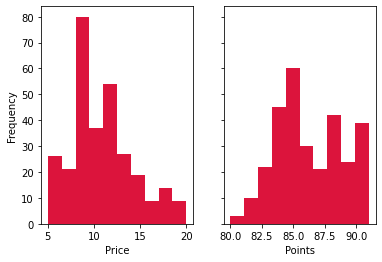

In [11]:
fig, axes = plt.subplots(
    1,2,
    sharey=True,
    squeeze=True
    )
our_wines["price"].plot(
    kind='hist',
    bins=10,
    ax=axes[0],
    color=["crimson"]
    ); axes[0].set_xlabel("Price")
our_wines["points"].plot(
    kind='hist',
    bins=10,
    ax=axes[1],
    color=["crimson"]
    ); axes[1].set_xlabel("Points")
plt.suptitle("Frequency analysis of quality points"/ 
    "and price for Vinho Verde wines",
    fontsize=12
    )
plt.tight_layout()

Text(0.5, 1.0, 'Quality label distribution')

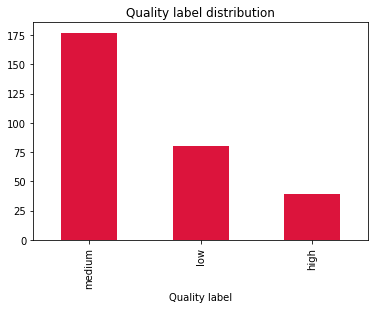

In [12]:
tempr=pd.DataFrame(
    data = {
        "quality_label": [
            "low","medium","high"
            ],
        "count": our_wines.value_counts(
            subset = "quality_label"
            )
        }
    )
# tempr["count"] = preprocessing.minmax_scale(
#     tempr["count"], 
#     feature_range=(0.1, 1))
tempr["count"].plot(
    kind='bar',
    color=["crimson"]
    )
plt.xlabel("Quality label")
plt.title("Quality label distribution")

In [13]:
lw = (our_wines.loc[
    (our_wines["quality_label"] == "low")
    ])
mw = (our_wines.loc[
    (our_wines["quality_label"] == "medium")
    ])
hw = (our_wines.loc[
    (our_wines["quality_label"] == "high")
    ])

In [14]:
conl = lw.describe(
    ).applymap("{:.2f}".format
    ).drop(["points"],
    axis=1
    )
conm = mw.describe(
    ).applymap("{:.2f}".format
    ).drop(["points"],
    axis=1
    )
conh = hw.describe(
    ).applymap("{:.2f}".format
    ).drop(["points"],
    axis=1
    )
keys = ["Low", "Medium", "High"]
price_ran = pd.concat(
    (conl, conm, conh),
    axis=1,
    keys=keys
    )
price_ran

,Low,Medium,High
,price,price,price
count,80.00,177.00,39.00
mean,8.04,10.94,15.26
std,2.00,2.85,3.17
min,5.00,6.00,9.00
25%,6.75,9.00,13.00
50%,8.00,11.00,16.00
75%,9.00,12.00,17.50
max,13.00,20.00,20.00


[Text(0, 0, '24.6')]

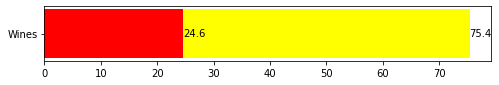

In [15]:
fig, ax = plt.subplots(figsize=(8,1))
labels = ["Wines"]
wr = [24.6, 75.4]
a = ax.barh(
    labels,
    wr[1],
    label = "White",
    color="yellow"
    )
ax.bar_label(a)
a = ax.barh(
    labels,
    wr[0],
    label = "Red",
    color="red"
    )
ax.bar_label(a)

In [16]:
prodw = [41140,
    40243,
    41618,
    43150,
    43016,
    45397,
    46946,
    48451,
    51599,
    53664,
    58024
    ]
prodr=[5779,
    5114,
    5294,
    5384,
    4716,
    4293,
    4041,
    3216,
    3279,
    3262,
    3079
    ]
year = list(range(2011, 2022))
prod = pd.DataFrame(list(
    zip(prodw, prodr, year)
    ),
    columns=["White", "Red", "Year"]
    )
prod["White"] = prod["White"] / 1000
prod["Red"] = prod["Red"] / 1000
prod["Total"] = prod["Red"] + prod["White"]

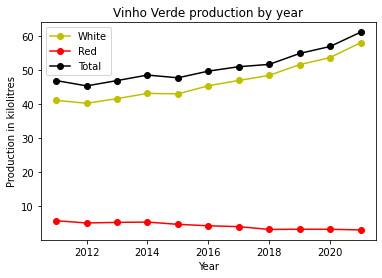

In [17]:
plt.plot(
    prod["Year"],
    prod["White"],
    "o-y",
    label = "White"
    )
plt.plot(
    prod["Year"],
    prod["Red"],
    "o-r",
    label = "Red"
    )
plt.plot(
    prod["Year"],
    prod["Total"],
    "o-k",
    label="Total"
    )
plt.xlabel("Year")
plt.title("Vinho Verde production by year")
plt.ylabel("Production in kilolitres")
plt.legend()
plt.show()

In [18]:
a = prod.sort_values(["Year"]).pct_change()
a = a.tail(10)
a.mean()

White    0.035384
Red     -0.058119
Year     0.000496
Total    0.027235
dtype: float64

Text(0.5, 1.0, 'Vinho Verde exports by year')

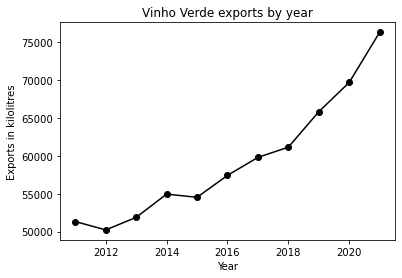

In [19]:
expt=[
    51330358,
    50224764,
    51880168,
    54951931,
    54531468,
    57425136,
    59804973,
    61151349,
    65834069,
    69704586,
    76330490
    ]
exps=[
    97090,
    83508,
    98681,
    88805,
    220772,
    202111,
    294461,
    301956,
    220519,
    305399,
    194394
    ]
year = list(range(2011, 2022))
expt = (expt+exps)
for i in range(len(expt)):
    expt[i] = expt[i] / 1000
exp = pd.DataFrame(list(
    zip(expt, year)),
    columns=["Volume","Year"]
    )
plt.plot(
    exp["Year"],
    exp["Volume"],
    "o-k"
    )
plt.xlabel("Year")
plt.ylabel("Exports in kilolitres")
plt.title("Vinho Verde exports by year")

In [20]:
a = exp.sort_values(["Year"]).pct_change()
a.mean()

Volume    0.041042
Year      0.000496
dtype: float64